Here is a brief overview of each column in the dataset, along with its data type:

| Column Name | Data Type            | Description      | 
|-------------|----------------------|------------------|
| Energy      | `numpy.float64`      | VASP total energy| 
| AdsE        | `numpy.float64`      | AdsE = Energy - E<sub>_clean-NP</sub> - E<sub>CO</sub>(g) |
| ads_site    | `str`                | Identity of Metal binding CO |
| atoms_opt   | `ase.atoms.Atoms`    | Atomic object of VASP optimized structure |
| M_Ag        | `numpy.int64`        | binary, metal at adsorption site |
| M_Au        | `numpy.int64`        |  |
| M_Cu        | `numpy.int64`        | |
| M_Pd        | `numpy.int64`        | |
| M_Pt        | `numpy.int64`        | |
| S_Ag        | `numpy.int64`        | Count of surface atoms neighboring adsorption metal atom |
| S_Au        | `numpy.int64`        | |
| S_Cu        | `numpy.int64`        | |
| S_Pd        | `numpy.int64`        | |
| S_Pt        | `numpy.int64`        | |
| B_Ag        | `numpy.int64`        | Count of subsurface atoms neighboring adsorption metal atom |
| B_Au        | `numpy.int64`        | |
| B_Cu        | `numpy.int64`        | |
| B_Pd        | `numpy.int64`        | |
| B_Pt        | `numpy.int64`        | |
| NP          | `str`                | NP's identifier, main text |

In [1]:
import pandas as pd

df = pd.read_pickle('dataset_with_features.pkl')
df

,Energy,AdsE,ads_site,atoms_opt,M_Ag,M_Au,M_Cu,M_Pd,M_Pt,S_Ag,S_Au,S_Cu,S_Pd,S_Pt,B_Ag,B_Au,B_Cu,B_Pd,B_Pt,NP
0,-185.817584,-0.301584,Ag,"(Atom('Pt', [12.3897, 9.95906, 11.36034], inde...",1,0,0,0,0,2,1,1,1,1,0,0,1,0,1,C
1,-185.993973,-0.477973,Ag,"(Atom('Pt', [12.27244, 9.96688, 11.42591], ind...",1,0,0,0,0,0,2,0,2,1,0,0,0,1,0,C
2,-186.119332,-0.603332,Ag,"(Atom('Pt', [12.28301, 9.96258, 11.42059], ind...",1,0,0,0,0,1,3,1,0,0,0,0,0,0,1,C
3,-185.943338,-0.427338,Ag,"(Atom('Pt', [12.27788, 9.9607, 11.42709], inde...",1,0,0,0,0,1,1,1,2,0,1,0,0,0,0,C
4,-185.690539,-0.174539,Ag,"(Atom('Pt', [12.26881, 9.95039, 11.42492], ind...",1,0,0,0,0,1,1,1,2,1,1,1,0,0,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,-186.823647,-1.886647,Pt,"(Atom('Ag', [12.24707, 10.03047, 11.38592], in...",0,0,0,0,1,0,2,1,1,2,0,2,0,0,0,G
330,-186.885309,-1.948309,Pt,"(Atom('Ag', [12.25903, 10.02402, 11.45003], in...",0,0,0,0,1,2,1,0,2,1,1,1,0,0,0,G
331,-186.885671,-1.948671,Pt,"(Atom('Ag', [12.24492, 10.0255, 11.36371], ind...",0,0,0,0,1,1,1,2,1,1,0,1,0,1,0,G
332,-186.862914,-1.925914,Pt,"(Atom('Ag', [12.1928, 10.0371, 11.40651], inde...",0,0,0,0,1,0,2,1,2,1,0,1,0,0,1,G


In [2]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

features_to_use = []
for col in df.columns:
    if 'M_' in col or 'S_' in col or 'B_' in col:     
        features_to_use.append(col)

X = df[features_to_use]
y = df['AdsE']

cv_score_mae = cross_val_score(LinearRegression(), X, y, cv=10, scoring='neg_mean_absolute_error')
print('MEAN ABSOLUTE ERROR')
print(f'Cross validation scores: {-cv_score_mae}')
print(f'Mean cv: {np.mean(-cv_score_mae):.3f} +/- {np.std(cv_score_mae):.3f}')
print('-------------------------------------------')
# print root mean squared error
cv_score_rmse = cross_val_score(LinearRegression(), X, y, cv=10, scoring='neg_root_mean_squared_error')
print('ROOT MEAN SQUARED ERROR')
print(f'Cross validation scores: {-cv_score_rmse}')
print(f'Mean cv: {np.mean(-cv_score_rmse):.3f} +/- {np.std(cv_score_rmse):.3f}')
print('-------------------------------------------')

MEAN ABSOLUTE ERROR
Cross validation scores: [0.08162243 0.09946497 0.10235483 0.08690149 0.09160016 0.10232565
 0.11614177 0.08167634 0.07896116 0.10514013]
Mean cv: 0.095 +/- 0.012
-------------------------------------------
ROOT MEAN SQUARED ERROR
Cross validation scores: [0.1067829  0.14089625 0.12405629 0.11087865 0.11936472 0.15578904
 0.14491166 0.09561392 0.10346252 0.15773922]
Mean cv: 0.126 +/- 0.021
-------------------------------------------


MAE (test) = 0.0952 eV


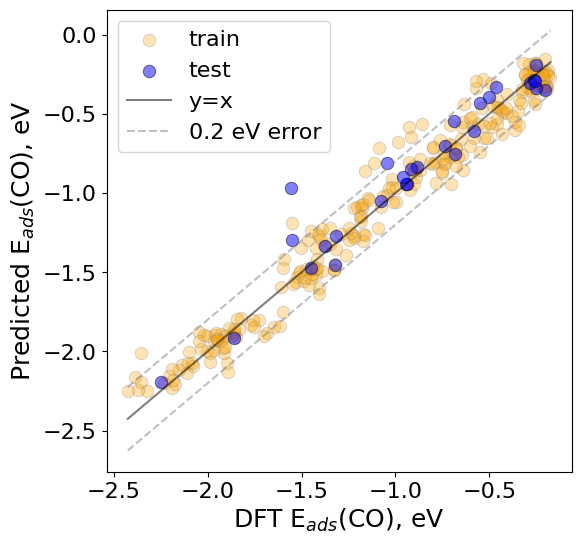

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

model = LinearRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

fig, ax = plt.subplots(figsize=(6, 6))

sns.scatterplot(x=y_train, y=y_train_pred, ax=ax, s=80, color='orange', alpha=0.3, label='train', edgecolor='gray')
sns.scatterplot(x=y_test, y=y_pred, ax=ax, s=80, color='blue', alpha=0.5, label='test', edgecolor='black')
sns.lineplot(x=y_train, y=y_train, ax=ax, color='black', alpha=0.5, label='y=x')

## Add two diagonal lines to show the error (0.2 eV tolerance)
# Upper line
sns.lineplot(x=y_train, y=y_train + 0.2, ax=ax, color='gray', linestyle='dashed', alpha=0.5, label='0.2 eV error')
# Lower line
sns.lineplot(x=y_train, y=y_train - 0.2, ax=ax, color='gray', linestyle='dashed', alpha=0.5,)

ax.tick_params(axis='both', which='major', labelsize=16)

# Set the labels
ax.set_xlabel(r'DFT E$_{ads}$(CO), eV', fontsize=18)
ax.set_ylabel(r'Predicted E$_{ads}$(CO), eV', fontsize=18)

ax.legend(fontsize=16)


_mae = np.mean(abs(y_test - y_pred))
print(f'MAE (test) = {_mae:4.3} eV')

# Monte-Carlo generated Site motifs

## Pd = Pt = 20 %

In [8]:
df_ase_pdpt_20_features = pd.read_pickle('monte-carlo_motifs_Pd_Pt_20.pkl')

# Use the Features df to predict the new Ads E
features_to_use = []
for col in df_ase_pdpt_20_features.columns:
    if 'M_' in col or 'S_' in col or 'B_' in col:
        features_to_use.append(col)

df_ase_pdpt_20_features['E_ads'] = model.predict(df_ase_pdpt_20_features[X_train.columns])

# Define the composition columns
composition_cols = ['Ag', 'Au', 'Cu', 'Pd', 'Pt']

# Create a boolean mask for E_ads between -0.6 and -0.4
mask = df_ase_pdpt_20_features['E_ads'].between(-0.6, -0.4)

# Group by the full composition tuple and compute the percentage in the range
summary_df = (
    df_ase_pdpt_20_features
    .groupby(composition_cols)
    .apply(lambda grp: grp.loc[mask, 'E_ads'].count() * 100 / len(grp))
    .reset_index(name='Percentage E_ads in [-0.6, -0.4] (%)')
)

summary_df

/var/folders/r_/lc4wctg15fn2kjd_85v0kjw80000gp/T/ipykernel_5701/3003053941.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: grp.loc[mask, 'E_ads'].count() * 100 / len(grp))


,Ag,Au,Cu,Pd,Pt,"Percentage E_ads in [-0.6, -0.4] (%)"
0,0,0,60,20.0,20.0,0.23
1,0,5,55,20.0,20.0,3.62
2,0,10,50,20.0,20.0,6.31
3,0,15,45,20.0,20.0,9.26
4,0,20,40,20.0,20.0,11.76
...,...,...,...,...,...,...
86,50,5,5,20.0,20.0,20.99
87,50,10,0,20.0,20.0,21.92
88,55,0,5,20.0,20.0,24.08
89,55,5,0,20.0,20.0,23.70


In [20]:
# define your desired hex-colors
metal_colors = {
    'Ag': 'silver',   # silver
    'Au': 'gold',   # gold
    'Cu': 'peru',   # copper
    'Pd': 'lightseagreen',   # palladium (pale gray)
    'Pt': 'royalblue',   # platinum (light gray)
}

def binding_site_from_features(row):
    for col in row.index:
        if col.startswith('M_') and row[col] == 1:
            bondingsite = col.split('_')[-1]
    return bondingsite

In [21]:
df_ase_pdpt_20_features['site_metal'] = df_ase_pdpt_20_features.apply(binding_site_from_features, axis=1)
df_ase_pdpt_20_features

,Ag,Au,Cu,Pd,Pt,M_Ag,M_Au,M_Cu,M_Pd,M_Pt,...,S_Cu,S_Pd,S_Pt,B_Ag,B_Au,B_Cu,B_Pd,B_Pt,E_ads,site_metal
0,0,0,60,20.0,20.0,0,0,1,0,0,...,3,2,0,0,0,1,0,0,-0.936035,Cu
1,0,0,60,20.0,20.0,0,0,0,0,1,...,3,0,2,0,0,0,0,1,-2.170410,Pt
2,0,0,60,20.0,20.0,0,0,1,0,0,...,2,1,2,0,0,0,1,0,-1.001953,Cu
3,0,0,60,20.0,20.0,0,0,1,0,0,...,2,2,1,0,0,1,0,0,-0.918457,Cu
4,0,0,60,20.0,20.0,0,0,1,0,0,...,3,1,1,0,0,1,0,0,-0.924316,Cu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909995,60,0,0,20.0,20.0,0,0,0,1,0,...,0,2,1,0,0,0,0,2,-1.480469,Pd
909996,60,0,0,20.0,20.0,0,0,0,0,1,...,0,2,0,2,0,0,0,0,-1.993652,Pt
909997,60,0,0,20.0,20.0,1,0,0,0,0,...,0,0,3,1,0,0,1,0,-0.324219,Ag
909998,60,0,0,20.0,20.0,1,0,0,0,0,...,0,3,0,2,0,0,0,0,-0.333496,Ag


Percentage of sites with Eads between -0.6 and -0.4: 14.16%


/var/folders/r_/lc4wctg15fn2kjd_85v0kjw80000gp/T/ipykernel_5701/480199555.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()


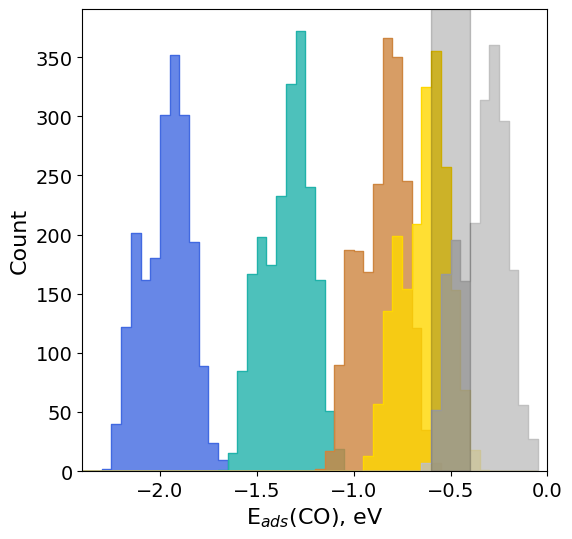

In [22]:
from matplotlib.patches import Patch

# df_ase_pdpt_20["site_metal"] = df_ase_pdpt_20["centre_c"].combine_first(df_ase_pdpt_20["centre_e"])
#df_ase_pdpt_20['E_ads'] = df_ase_pdpt_20_features['E_ads']

df_plot_equimolar = df_ase_pdpt_20_features.query('Ag == 20 & Au == 20 & Cu == 20')

n_sites = len(df_plot_equimolar)
n_sites_06_04 = len(df_plot_equimolar.query('E_ads > -0.6 and E_ads < -0.4'))

print(f'Percentage of sites with Eads between -0.6 and -0.4: {n_sites_06_04/n_sites*100:.2f}%')

fig, ax = plt.subplots(figsize=(6,6))

hue_order = ['Ag','Au','Cu','Pd','Pt']

sns.histplot(data=df_plot_equimolar, x='E_ads', element='step', fill=True, hue_order=hue_order,
             alpha=0.8, bins=np.arange(-2.5,0.0,0.05), color='dodgerblue', hue='site_metal',
             palette=metal_colors, ax=ax)

ax.set_xlim(-2.4, 0)

# figure out which metals still have points in that window
x0, x1 = ax.get_xlim()
visible = []
for m in metal_colors:
    vals = df_plot_equimolar.loc[df_plot_equimolar['site_metal']==m, 'E_ads']
    if ((vals >= x0) & (vals <= x1)).any():
        visible.append(m)

# create proxy legend‐patches for just those
legend_handles = [Patch(facecolor=metal_colors[m], label=m) 
                  for m in visible]

#ax.legend(handles=legend_handles, title='Bonding Metal', fontsize=12, title_fontsize=12)
ax.legend().remove()

# Shade the region between -0.6 and -0.4
plt.axvspan(-0.6, -0.4, color='black', alpha=0.2)
plt.xlabel(r'E$_{ads}$(CO), eV', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

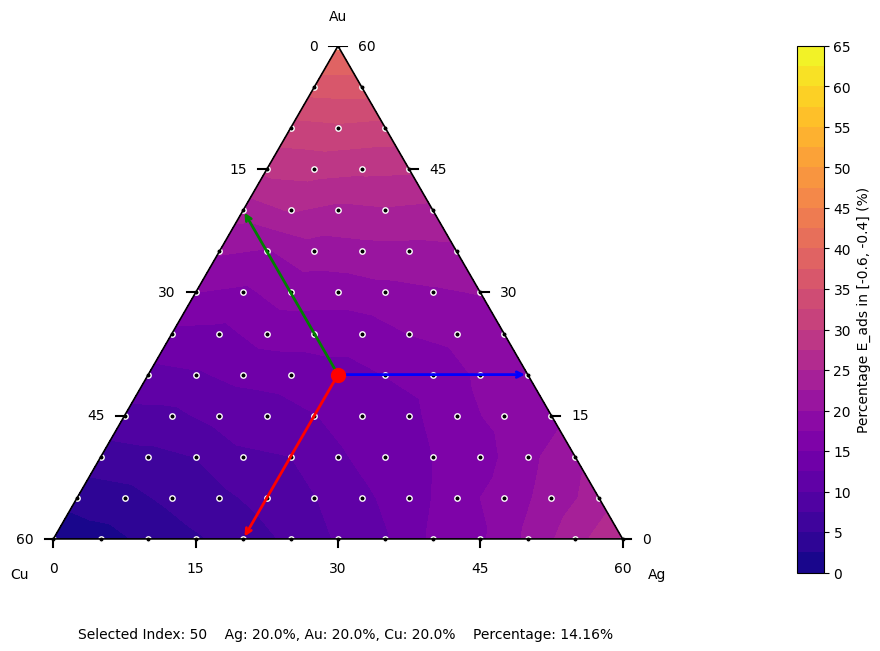

In [ ]:
import random
import matplotlib.tri as tri

####################################################
column_name='Percentage E_ads in [-0.6, -0.4] (%)'
total=60
max_lvl=65
num_lv=27
n_ticks=5
ref_point={'Ag':20, 'Au':20, 'Cu':20}
####################################################

# Ternary plot setup
total = total
fraction_Cu = summary_df['Cu'] / total
fraction_Ag = summary_df['Ag'] / total
fraction_Au = summary_df['Au'] / total

x = fraction_Ag + 0.5 * fraction_Au
y = (np.sqrt(3) / 2) * fraction_Au
z = summary_df[column_name]

triangulation = tri.Triangulation(x, y)

# Levels for the plot
lv_down = 0
lv_up = max_lvl
num_lv = num_lv
levels = np.linspace(lv_down, lv_up, num_lv)

fig, ax = plt.subplots(figsize=(14, 6))
contour = ax.tricontourf(triangulation, z, levels=levels, cmap='plasma', vmin=lv_down, vmax=lv_up)
ax.scatter(x, y, c='k', s=15, edgecolors='white')

cbar = fig.colorbar(contour, ax=ax, pad=0.1, extend='max')
cbar.set_label(column_name)
cbar.set_ticks(np.arange(0, lv_up+1, 5))

# Draw triangle boundary
vertices = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2], [0, 0]])
ax.plot(vertices[:, 0], vertices[:, 1], 'k-', lw=1.2)

# Tick marks
n_ticks = n_ticks
ticks = np.linspace(0, 1, n_ticks)
for t in ticks:
    pct = int(t * total)
    # Bottom edge
    xb, yb = t, 0
    ax.plot([xb, xb], [0, -0.015], 'k-')
    ax.text(xb, -0.04, f'{pct}', ha='center', va='top')
    # Right edge
    xr = 1 - 0.5 * t
    yr = (np.sqrt(3)/2) * t
    ax.plot([xr, xr + 0.015], [yr, yr], 'k-')
    ax.text(xr + 0.035, yr, f'{pct}', va='center', ha='left')
    # Left edge
    xl = 0.5 * (1 - t)
    yl = (np.sqrt(3)/2) * (1 - t)
    ax.plot([xl, xl - 0.015], [yl, yl], 'k-')
    ax.text(xl - 0.035, yl, f'{pct}', va='center', ha='right')

# Corner labels
ax.text(-0.06, -0.05, 'Cu', ha='center', va='top')
ax.text(1.06, -0.05, 'Ag', ha='center', va='top')
ax.text(0.5, np.sqrt(3)/2 + 0.04, 'Au', ha='center', va='bottom')

# Select a point (according to defined composition of Ag, Au, Cu)
mask_int = (summary_df['Ag'] == ref_point['Ag']) & (summary_df['Au'] == ref_point['Au']) & (summary_df['Cu'] == ref_point['Cu'])
idx = summary_df.index[mask_int].tolist()[0]

# Fetch its coords and data
x0, y0 = x.iloc[idx], y.iloc[idx]
comp = summary_df.loc[idx, ['Ag', 'Au', 'Cu']]
z0 = z.iloc[idx]

# Then continue marking/annotating as before…
ax.scatter([x0], [y0], color='red', s=100, zorder=5)
# … arrows, legend, etc.

# Compute endpoints where rays from (x0,y0) parallel to each edge hit the boundary

sqrt3 = np.sqrt(3)

# 1) Horizontal ray to the right (parallel to bottom edge y=0)
#    meets right edge y = -sqrt3*x + sqrt3
x_r = (sqrt3 - y0) / sqrt3
y_r = y0

# 2) Ray parallel to right edge (direction = (-0.5, +sqrt3/2))
#    meets left edge y = sqrt3*x
t_ul = (sqrt3 * x0 - y0) / sqrt3
x_ul = x0 - 0.5 * t_ul
y_ul = y0 + (sqrt3/2) * t_ul

# 3) Ray parallel to left edge (direction = (-0.5, -sqrt3/2))
#    meets bottom edge y = 0
t_dl = y0 / (sqrt3/2)
x_dl = x0 - 0.5 * t_dl
y_dl = 0.0

# Draw the three colored arrows
ax.annotate('', xy=(x_r,  y_r),  xytext=(x0, y0),
            arrowprops=dict(arrowstyle='->', color='blue',  lw=2))
ax.annotate('', xy=(x_ul, y_ul), xytext=(x0, y0),
            arrowprops=dict(arrowstyle='->', color='green', lw=2))
ax.annotate('', xy=(x_dl, y_dl), xytext=(x0, y0),
            arrowprops=dict(arrowstyle='->', color='red',   lw=2))


# Annotate selected composition below plot
info = (
    f"Selected Point Index: {idx}    "
    f"Ag: {comp['Ag']}%, Au: {comp['Au']}%, Cu: {comp['Cu']}%    "
    f"Percentage: {z0:.2f}%"
)
fig.text(0.52, -0.05, info, ha='center', va='top')

ax.set_aspect('equal')
ax.axis('off')
plt.tight_layout()
plt.show()